In [1]:
import numpy as np 
from brian2tools import *
from tools.functions import *
from tools.srbm_reconstruction import *
import matplotlib.pyplot as plt


/opt/homebrew/Caskroom/miniconda/base/envs/jupyt-tf/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
date = '2023-04-28'
time = '18-04'
path = "output/"

# Load matrices
W, Wvh, Wch, mBv, mBh, b_c, b_v, b_h, mB = load_matrices(date, time, path)

# Load data
train_test_sequence_data = load_data("data_finnegan_0.1_0.05_5_200_1000")

# Preparing the data
sequence_data = get_data(n_samples=n_samples, min_p = .00001, max_p = .98, binary = True, seed=0, 
                           load_from_drive=False, data=train_test_sequence_data, num_classes = range(n_classes))

Matrices loaded from output/output/2023-04-28/18-04//
Data loaded from data/data_finnegan_0.1_0.05_5_200_1000.npy


In [4]:

Ids = np.column_stack([
    create_single_Id(0, sequence_data, N_v = N_v, N_c = N_c, n_c_unit = n_c_unit, 
                    beta_parameter = beta_parameter, 
                    mult_class = 0.0, mult_data = 1.0) * 0,
    create_single_Id(0, sequence_data, N_v = N_v, N_c = N_c, n_c_unit = n_c_unit, 
                    beta_parameter = beta_parameter, 
                    mult_class = 0.0, mult_data = 1.0) * 0 ,
    create_single_Id(1, sequence_data, N_v = N_v, N_c = N_c, n_c_unit = n_c_unit, 
                    beta_parameter = beta_parameter, 
                    mult_class = 0.0, mult_data = 1.0),
    create_single_Id(2, sequence_data, N_v = N_v, N_c = N_c, n_c_unit = n_c_unit, 
                    beta_parameter = beta_parameter, 
                    mult_class = 1.0, mult_data = 0.0) * 0,
    create_single_Id(3, sequence_data, N_v = N_v, N_c = N_c, n_c_unit = n_c_unit, 
                    beta_parameter = beta_parameter, 
                    mult_class = 0.0, mult_data = 1.0) * 0,
    create_single_Id(4, sequence_data, N_v = N_v, N_c = N_c, n_c_unit = n_c_unit, 
                    beta_parameter = beta_parameter, 
                    mult_class = 0.0, mult_data = 1.0 ) * 0
    ]).T



In [5]:

def create_Id_pattern(n, data, N_v, N_c, n_c_unit, beta_parameter, on_off_ratio, seed = 0, data_mult = 1, class_mult = 0):
    np.random.seed(seed)
    Ids = [create_single_Id(0, data, N_v = N_v, N_c = N_c, n_c_unit = n_c_unit, 
                    beta_parameter = beta_parameter, 
                    mult_class = 0.0, mult_data = 0.0)]
    labels_out = []
    labels = np.unique(data[1])
    for i in range(n):
        label = np.random.choice(labels, 1)[0]
        Ids.append(create_single_Id(label, data, N_v = N_v, N_c = N_c, n_c_unit = n_c_unit, 
                    beta_parameter = beta_parameter, 
                    mult_class = class_mult, mult_data = data_mult))
        labels_out.append(label)
        for j in range(on_off_ratio):
            Ids.append(create_single_Id(0, data, N_v = N_v, N_c = N_c, n_c_unit = n_c_unit, 
                    beta_parameter = beta_parameter, 
                    mult_class = 0.0, mult_data = 0.0))
            labels_out.append(label)
    return (np.column_stack(Ids).T, labels_out)


In [88]:

n_patterns = 9
on_off_ratio = 3
Ids, labels = create_Id_pattern(n_patterns, sequence_data, N_v = N_v, N_c = N_c, n_c_unit = n_c_unit, beta_parameter = beta_parameter, 
                        on_off_ratio = on_off_ratio, seed = 14, data_mult = 0, class_mult = 1)
print(Ids.shape)
print(labels[::3])

timepoints, t_sim, time_points_dict = create_timepoints(Ids, init_delay, delay, T)


(37, 220)
[3, 3, 0, 4, 1, 1, 2, 4, 2, 2, 0, 0]


In [89]:

out = main(W, b_v, b_c, b_h, t_sim = t_sim, Id = Ids, monitors = True)
Mh, Mv, Mc= out['Mh'], out['Mv'], out['Mc']


Creating equation
3.6796936988830566


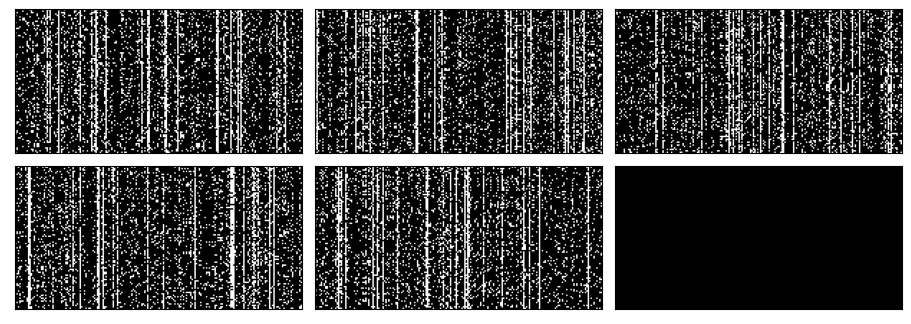

In [90]:

show_rows = int(N_inputs/2)
p1 = sequence_data[2][sequence_data[3] == 0][0:show_rows].reshape(show_rows, N_inputs)
p2 = sequence_data[2][sequence_data[3] == 1][0:show_rows].reshape(show_rows, N_inputs)
p3 = sequence_data[2][sequence_data[3] == 2][0:show_rows].reshape(show_rows, N_inputs)
p4 = sequence_data[2][sequence_data[3] == 3][0:show_rows].reshape(show_rows, N_inputs)
p5 = sequence_data[2][sequence_data[3] == 4][0:show_rows].reshape(show_rows, N_inputs)
p6 = np.zeros((show_rows, N_inputs))

plot_dat = [p1, p2, p3, p4, p5, p6]

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(9,6), layout="compressed")

i = 0
for row in ax:
    for col in row:
        col.imshow(plot_dat[i], cmap='gray', interpolation="antialiased")
        col.axes.get_xaxis().set_ticks([])
        col.axes.get_yaxis().set_ticks([])
        i += 1

plt.show()


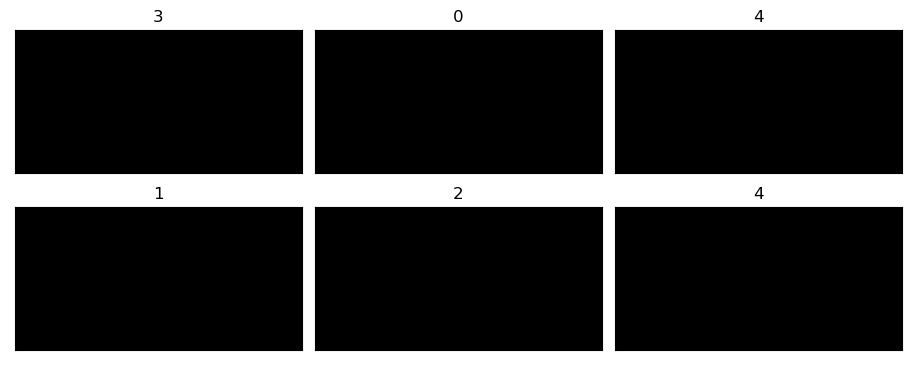

In [92]:

#'antialiased', 'none', 'nearest', 'bilinear', 'bicubic', 'spline16', 'spline36', 'hanning', 
# 'hamming', 'hermite', 'kaiser', 'quadric', 'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 
# 'lanczos', 'blackman'
label_ids = np.arange(1, n_patterns*on_off_ratio, on_off_ratio+1) # every nth label is taken as each id pattern is shown for n timepoints and not present for n more 

plot_id1=np.array(np.repeat(Ids[label_ids[0]][0:N_inputs], show_rows)).reshape(N_inputs,show_rows).T
plot_id2=np.array(np.repeat(Ids[label_ids[1]][0:N_inputs], show_rows)).reshape(N_inputs,show_rows).T
plot_id3=np.array(np.repeat(Ids[label_ids[2]][0:N_inputs], show_rows)).reshape(N_inputs,show_rows).T
plot_id4=np.array(np.repeat(Ids[label_ids[3]][0:N_inputs], show_rows)).reshape(N_inputs,show_rows).T
plot_id5=np.array(np.repeat(Ids[label_ids[4]][0:N_inputs], show_rows)).reshape(N_inputs,show_rows).T
plot_id6=np.array(np.repeat(Ids[label_ids[5]][0:N_inputs], show_rows)).reshape(N_inputs,show_rows).T

plot_ids = [plot_id1, plot_id2, plot_id3, plot_id4, plot_id5, plot_id6]

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(9,6), layout="compressed")
i = 0
for row in ax:
    for col in row:
        col.imshow(plot_ids[i], cmap='gray', interpolation="antialiased")
        col.axes.get_xaxis().set_ticks([])
        col.axes.get_yaxis().set_ticks([])
        col.set_title(labels[label_ids[i]])
        i += 1
plt.show()


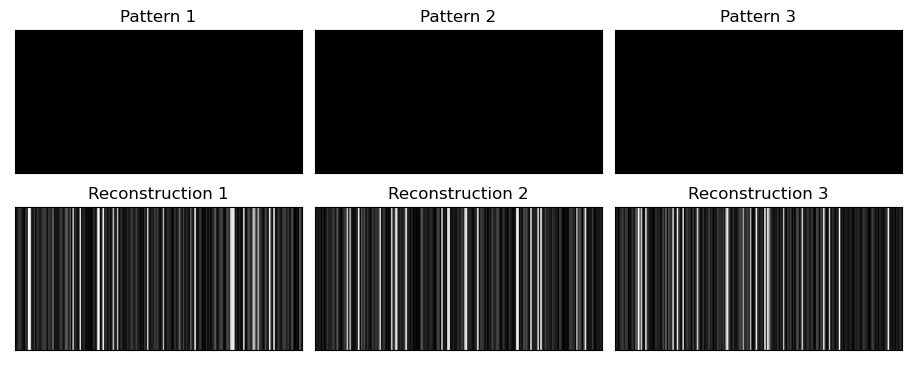

In [105]:

time_point_start_ids = np.arange(0, len(timepoints), (on_off_ratio+1) * 2) + 1
time_point_end_ids = np.arange(0, len(timepoints), (on_off_ratio+1) * 2) + 2

delay1 = 10, 
delay2 = delay1
delay3 = delay1

vist1 = np.repeat(np.array(spike_histogram(Mv,timepoints[time_point_start_ids[0]]+delay1*t_ref,timepoints[time_point_end_ids[0]])).T[1], show_rows).reshape(N_inputs,show_rows).T
vist2 = np.repeat(np.array(spike_histogram(Mv,timepoints[time_point_start_ids[1]]+delay2*t_ref,timepoints[time_point_end_ids[1]])).T[1], show_rows).reshape(N_inputs,show_rows).T
vist3 = np.repeat(np.array(spike_histogram(Mv,timepoints[time_point_start_ids[2]]+delay3*t_ref,timepoints[time_point_end_ids[2]])).T[1], show_rows).reshape(N_inputs,show_rows).T

p1 = np.repeat(np.mean(sequence_data[2][sequence_data[3] == labels[label_ids[0]]][0:show_rows].reshape(show_rows, N_inputs), axis=0), show_rows).reshape(N_inputs, show_rows).T
p2 = np.repeat(np.mean(sequence_data[2][sequence_data[3] == labels[label_ids[1]]][0:show_rows].reshape(show_rows, N_inputs), axis=0), show_rows).reshape(N_inputs, show_rows).T
p3 = np.repeat(np.mean(sequence_data[2][sequence_data[3] == labels[label_ids[2]]][0:show_rows].reshape(show_rows, N_inputs), axis=0), show_rows).reshape(N_inputs, show_rows).T

plt_list = [vist1, vist2, vist3, p1, p2, p3]
titles = ["Pattern 1", "Pattern 2", "Pattern 3", "Reconstruction 1", "Reconstruction 2", "Reconstruction 3"]

fig, ax = plt.subplots(2, 3, figsize=(9,6), layout="compressed")
i = 0
for row in ax:
    for col in row:
        col.imshow(plt_list[i], cmap='gray', interpolation="antialiased")
        col.axes.get_xaxis().set_ticks([])
        col.axes.get_yaxis().set_ticks([])
        col.set_title(titles[i])
        i += 1

plt.show()


In [107]:
frequency_classification(Mc, n_classes, n_c_unit, t_ref=t_ref, t_start=T1_s, t_end=T1_e*second, delay = 10)

p-value: 0.001. Confidence: High


3

In [108]:
def hamming_distance(x, y):
    return np.sum(np.abs(x - y))

def euclidean_distance(x, y):
    return np.sqrt(np.sum((x - y)**2))

def rmse(x, y):
    return np.sqrt(np.mean((x - y)**2))

def cosine_similarity(x, y):
    return np.dot(x, y) / (np.sqrt(np.sum(x**2)) * np.sqrt(np.sum(y**2)))

def to_binary(data, threshold = 0.5):
    return np.array(data > threshold, dtype=np.int)

def rescale(spike_histogram, new_max = 1, threshold = None):
    if threshold is not None:
        spike_histogram = to_binary(spike_histogram, np.max(spike_histogram) * threshold)
    return spike_histogram * new_max / np.max(spike_histogram)

def plot_output(spike_histogram, depth = 100):
    length = len(spike_histogram)
    plt.figure(figsize=(10, 10))
    plt.imshow(np.repeat(spike_histogram, depth).reshape(length, depth).T, cmap='gray')
    plt.show()

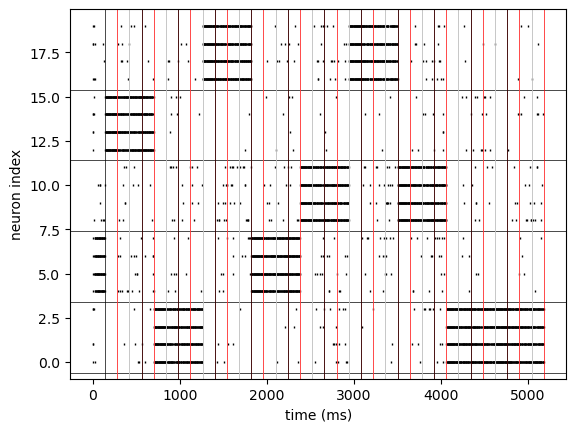

In [109]:

plot_raster(Mc.i, Mc.t, markersize=2, marker='|', color='k', mew=1)
for i in range(n_classes):
    axhline(-0.6+float(i)*4, color='k', linewidth=0.5)
color_list = ['k', '#FFFFFF', "r"]
col_cnt = 0
for i in timepoints:
    axvline(i/second*1000, color=color_list[col_cnt%len(color_list)], linewidth=0.5)
    col_cnt += 1


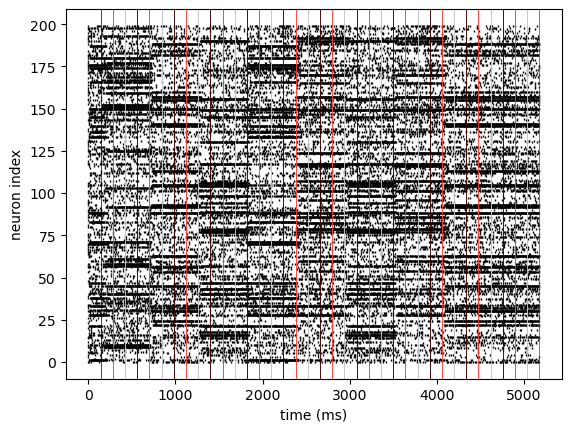

In [110]:

plot_raster(Mv.i, Mv.t, markersize=2,marker='|', color='k', mew=1)
col_cnt = 0
for i in timepoints:
    axvline(i/second*1000, color=color_list[col_cnt%len(color_list)], linewidth=0.5)
    col_cnt += 1


In [ ]:

plot_raster(Mh.i, Mh.t, markersize=2,marker='|', color='k', mew=1)
col_cnt = 0
for i in timepoints:
    axvline(i/second*1000, color=color_list[col_cnt%len(color_list)], linewidth=0.5)
    col_cnt += 1

